In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.svm import SVC, LinearSVC

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns



<AxesSubplot:>

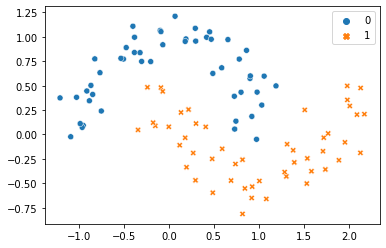

In [2]:
x,y = make_moons(n_samples = 100, noise = 0.15)
sns.scatterplot(x = x[:,0],y = x[:,1],style = y, hue = y)

In [20]:
my_model = Pipeline([
    ('poly',PolynomialFeatures(degree = 3)),
    ('scaler',StandardScaler()),
    ('svc',LinearSVC(C = 10,loss = 'hinge'))
])

my_model.fit(x,y)

C:\Users\Gerardo\.virtualenvs\ml\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc', LinearSVC(C=10, loss='hinge'))])

In [21]:
print(my_model['poly'].get_feature_names_out())
print(my_model['svc'].coef_.T)
print(my_model['svc'].intercept_)


['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']
[[ 0.        ]
 [-1.73500469]
 [-0.68832434]
 [-3.87524982]
 [-0.62410552]
 [ 0.08203557]
 [ 7.46514407]
 [-0.59019095]
 [ 0.98991929]
 [-2.06144423]]
[0.50526856]


In [59]:
fts =my_model['poly'].get_feature_names_out()   
vars = my_model['svc'].coef_

str = ''
[''.append(k*p) for k,p in zip(vars,fts)]
pritn(str)

AttributeError: 'str' object has no attribute 'append'

In [22]:
boundary_func = lambda x0,x1: np.array([0.  *1      
+-1.73500469 * x0
+-0.68832434 *x1
+-3.87524982 * x0**2
+-0.62410552 * x0 * x1
+ 0.08203557 * x1 ** 2
+ 7.46514407 * x0 ** 3 
+-0.59019095 * x0**2 *x1
+ 0.98991929 * x0 *x1** 2
+-2.06144423 * x1**3
+0.50526856]) 


In [6]:
my_scaler = StandardScaler()
x_trans = my_scaler.fit_transform(x)

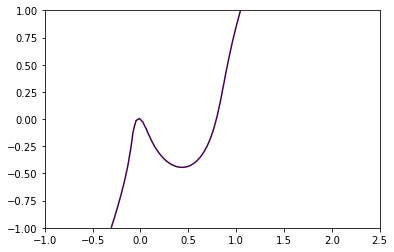

In [17]:
x1,x2 = np.meshgrid(np.linspace(-1,2.5,100),np.linspace(-1,1,100))
#outs = np.zeros(boundary_func(x1,x2)[0].shape)
#outs[boundary_func(x1,x2)[0] > 0 ] =1 

outs = boundary_func(x1,x2)[0]
plt.contour(x1,x2,outs,[0])


Features of 3 samples in second subplot: 
[[ 0.90242851  0.57412155]
 [ 1.03312309  0.30109931]
 [ 1.39500985 -0.28632315]]
Scaled features of 3 samples in second subplot: 
[[ 0.45915315  0.63081675]
 [ 0.60673328  0.08833666]
 [ 1.0153753  -1.07883928]]
Classification of the 3 samples in second subplot: 
[0 0 1]
Model predictions for the 3 samples (notice they are different, and thus lie in different parts of the hyperplane): 
[0 0 1]


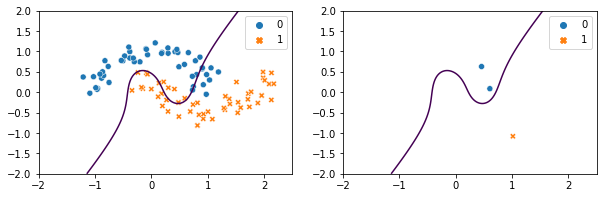

In [25]:
fig,ax = plt.subplots(ncols=2,figsize=(10,3))

sns.scatterplot(x = x[:,0],y = x[:,1],style = y, hue = y,ax=ax[0])
#ax[0].plot(np.linspace(-1,2.5,100),boundary_func(np.linspace(-1,2.5,100),np.linspace(-1,1,100)))
x1,x2 = np.meshgrid(np.linspace(-2,2.5,1000),np.linspace(-2,2,1000))
ax[0].contour(x1,x2,boundary_func(x1,x2)[0],[0])
ax[0].set_ylim([-2,2])



sns.scatterplot(x = x_trans[:3,0],y = x_trans[:3,1],style = y[:3], hue = y[:3],ax = ax[1])
ax[1].contour(x1,x2,boundary_func(x1,x2)[0],[0])
ax[1].set_ylim([-2,2])

print('Features of 3 samples in second subplot: \n'+ str(x[:3]))
print('Scaled features of 3 samples in second subplot: \n' + str(x_trans[:3]))
print('Classification of the 3 samples in second subplot: \n' + str(y[:3]))
print('Model predictions for the 3 samples (notice they are different, and thus lie in different parts of the hyperplane): \n' + str(my_model.predict(x[:3])))

[0]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


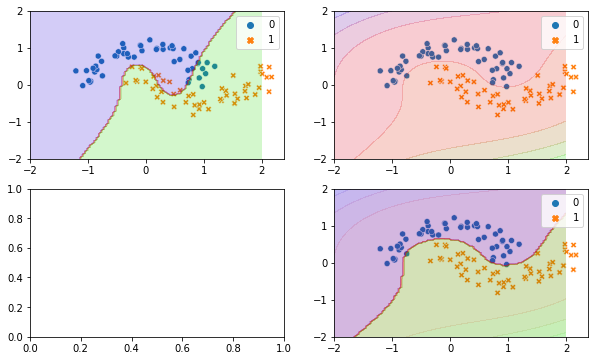

In [47]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    print(clf.predict([[1.5,1.5]]))
    y_pred = clf.predict(X).reshape(x0.shape)
    print(y_pred)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig,ax = plt.subplots(ncols=2,nrows = 2, figsize=(10,6))

sns.scatterplot(x = x[:,0],y = x[:,1],style = y, hue = y,ax=ax[0][0])
tmpx1,tmpx2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
bnfunc = boundary_func(tmpx1,tmpx2)[0]

tmp_out = np.zeros(bnfunc.shape)
tmp_out[bnfunc > 0] = 1

ax[0][0].contourf(tmpx1,tmpx2,tmp_out,cmap=plt.cm.brg, alpha=0.2)

sns.scatterplot(x = x[:,0],y = x[:,1],style = y, hue = y,ax=ax[0][1])

decfunc  = my_model.decision_function(np.c_[tmpx1.ravel(),tmpx2.ravel()]).reshape((len(tmpx1),len(tmpx2)))
ax[0][1].contourf(tmpx1,tmpx2,decfunc,cmap = plt.cm.brg,alpha = 0.2)

sns.scatterplot(x = x[:,0],y = x[:,1],style = y, hue = y,ax=ax[1][1])
plot_predictions(my_model,[-2,2,-2,2])